## Visualizing the Data

### Loading the required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
from IPython.display import HTML
%matplotlib inline

### Loading the dataset 

In [2]:
lend = pd.read_csv('/Users/dennisvasquez/Downloads/aug2018lend.csv')

In [3]:
lend = lend.drop('Unnamed: 0', axis=1);

In [4]:
# Viewing a sample of the dataset
lend.sample(5)

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,...,log_bc_open_to_buy,log_delinq_amnt,log_total_bal_ex_mort,log_total_il_high_credit_limit,log_annual_inc,log_tot_cur_bal,log_revol_bal,log_total_rev_hi_lim,log_total_bc_limit,status_group
151677,35000,8.39%,90000.0,17.64,0,1.0,11,0,63865,68.5,...,10.211413,0.0,11.064527,0.000000,11.407565,11.991988,11.064527,11.443575,11.047710,1
234082,11625,13.98%,36000.0,19.17,1,0.0,10,0,9054,51.7,...,8.560253,0.0,9.813453,9.440340,10.491274,9.813453,9.110962,9.769956,9.449357,1
343142,35000,22.99%,120000.0,20.21,0,1.0,13,0,29895,81.5,...,7.173958,0.0,11.290956,10.975242,11.695247,12.581171,10.305447,10.510532,9.980449,1
76556,9950,12.12%,30000.0,29.90,0,1.0,19,0,10271,49.6,...,8.895904,0.0,10.839326,10.769979,10.308953,11.811496,9.237080,9.937889,9.740969,0
115064,4200,8.90%,41200.0,19.87,0,0.0,14,0,9201,50.3,...,5.921578,0.0,9.855242,9.519662,10.626194,11.834639,9.127067,9.814656,8.999619,0


In [5]:
lend.shape

(400489, 65)

### Selecting the features to analyze

In [6]:
lend_features = [
'annual_inc',
'dti',
'delinq_2yrs', # 30dpd delinquencies from past 2 years
'inq_last_6mths', # inquiries since past 6 months
'open_acc', # number of open credit lines on file
'pub_rec', # number of derogatory public records
'revol_bal',
'revol_util',
'total_acc', # total number of credit lines currently on file
'last_credit_pull_d', # recent month lendinclub pulled credit
'collections_12_mths_ex_med', # number of collections in 12 months excluding medical collections
'acc_now_delinq',
'tot_cur_bal',
'total_rev_hi_lim',
'acc_open_past_24mths',
'avg_cur_bal',
'bc_open_to_buy', # total open-to-buy on revolving bankcards
'bc_util', # ratio of current balance to credit limit for all bankcard accounts
'chargeoff_within_12_mths',
'delinq_amnt',
'mo_sin_old_il_acct', # months since oldest installment account was opened
'mo_sin_old_rev_tl_op',
'mo_sin_rcnt_rev_tl_op',
'mo_sin_rcnt_tl', # months since most recent account was opened
'mort_acc', # number of mortgage accounts
'mths_since_recent_bc', # months since recent bankcard account was opened
'mths_since_recent_inq',
'num_accts_ever_120_pd',
'num_actv_bc_tl',
'num_actv_rev_tl',
'num_bc_sats', # number of satisfactory bankcard accounts
'num_bc_tl', # number of bankcard accounts
'num_il_tl',
'num_op_rev_tl',
'num_rev_accts',
'num_rev_tl_bal_gt_0', # number of revolving trades with balance >0
'num_sats',
'num_tl_120dpd_2m', # number of accounts currently 120 dpd
'num_tl_30dpd',
'num_tl_90g_dpd_24m',
'num_tl_op_past_12m',
'pct_tl_nvr_dlq', # percent of trades never delinquent
'percent_bc_gt_75', # percent of all bankcard accounts >75%
'pub_rec_bankruptcies',
'tax_liens',
'tot_hi_cred_lim',
'total_bal_ex_mort',
'total_bc_limit',
'total_il_high_credit_limit'
]

X = lend[lend_features]
y = lend.status_group

## Visualizing certain features by loan status (loan performance: 0 = good, 1 = bad)

### Visualizing Debt-to-Income Data

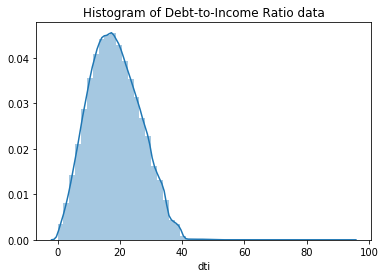

In [7]:
sns.distplot(lend.dti).set_title('Histogram of Debt-to-Income Ratio data');

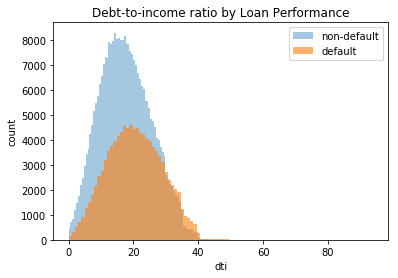

In [8]:
plt.hist(lend[lend['status_group']==0]['dti'].reset_index(drop=True),alpha=0.4,bins='rice', label='non-default')
plt.hist(lend[lend['status_group']==1]['dti'].reset_index(drop=True),alpha=0.6,bins='rice', label='default')
plt.title('Debt-to-income ratio by Loan Performance')
plt.xlabel('dti')
plt.ylabel('count')
plt.legend()
plt.show();

### Visualizing Annual Income Data

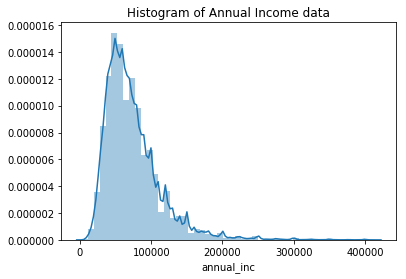

In [9]:
sns.distplot(lend.annual_inc).set_title('Histogram of Annual Income data');

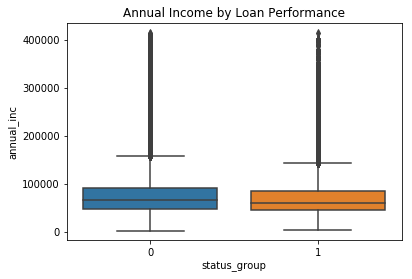

In [10]:
sns.boxplot(x='status_group', y='annual_inc',data = lend).set_title("Annual Income by Loan Performance");

### Visualizing Revolving Utilization Ratio Data

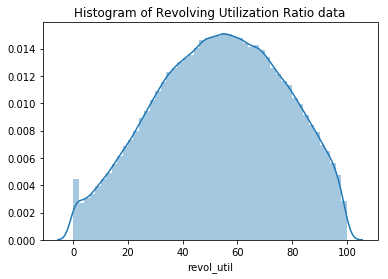

In [11]:
sns.distplot(lend.revol_util).set_title('Histogram of Revolving Utilization Ratio data');

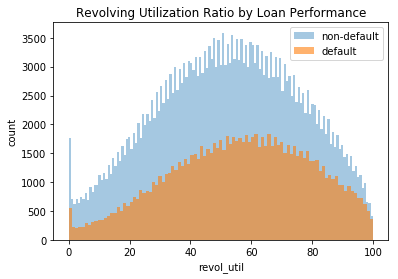

In [12]:
plt.hist(lend[lend['status_group']==0]['revol_util'].reset_index(drop=True),alpha=0.4,bins='rice', label='non-default')
plt.hist(lend[lend['status_group']==1]['revol_util'].reset_index(drop=True),alpha=0.6,bins='rice', label='default')
plt.title('Revolving Utilization Ratio by Loan Performance')
plt.xlabel('revol_util')
plt.ylabel('count')
plt.legend()
plt.show();

### Visualizing Total Current Balance Data

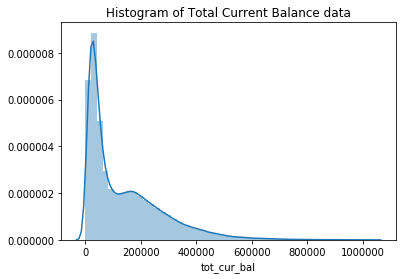

In [13]:
sns.distplot(lend.tot_cur_bal).set_title('Histogram of Total Current Balance data');

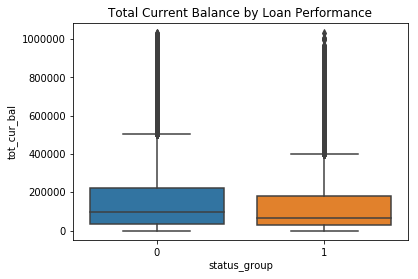

In [14]:
sns.boxplot(x='status_group', y='tot_cur_bal',data = lend).set_title("Total Current Balance by Loan Performance");

### Visualizing the correlation between select features

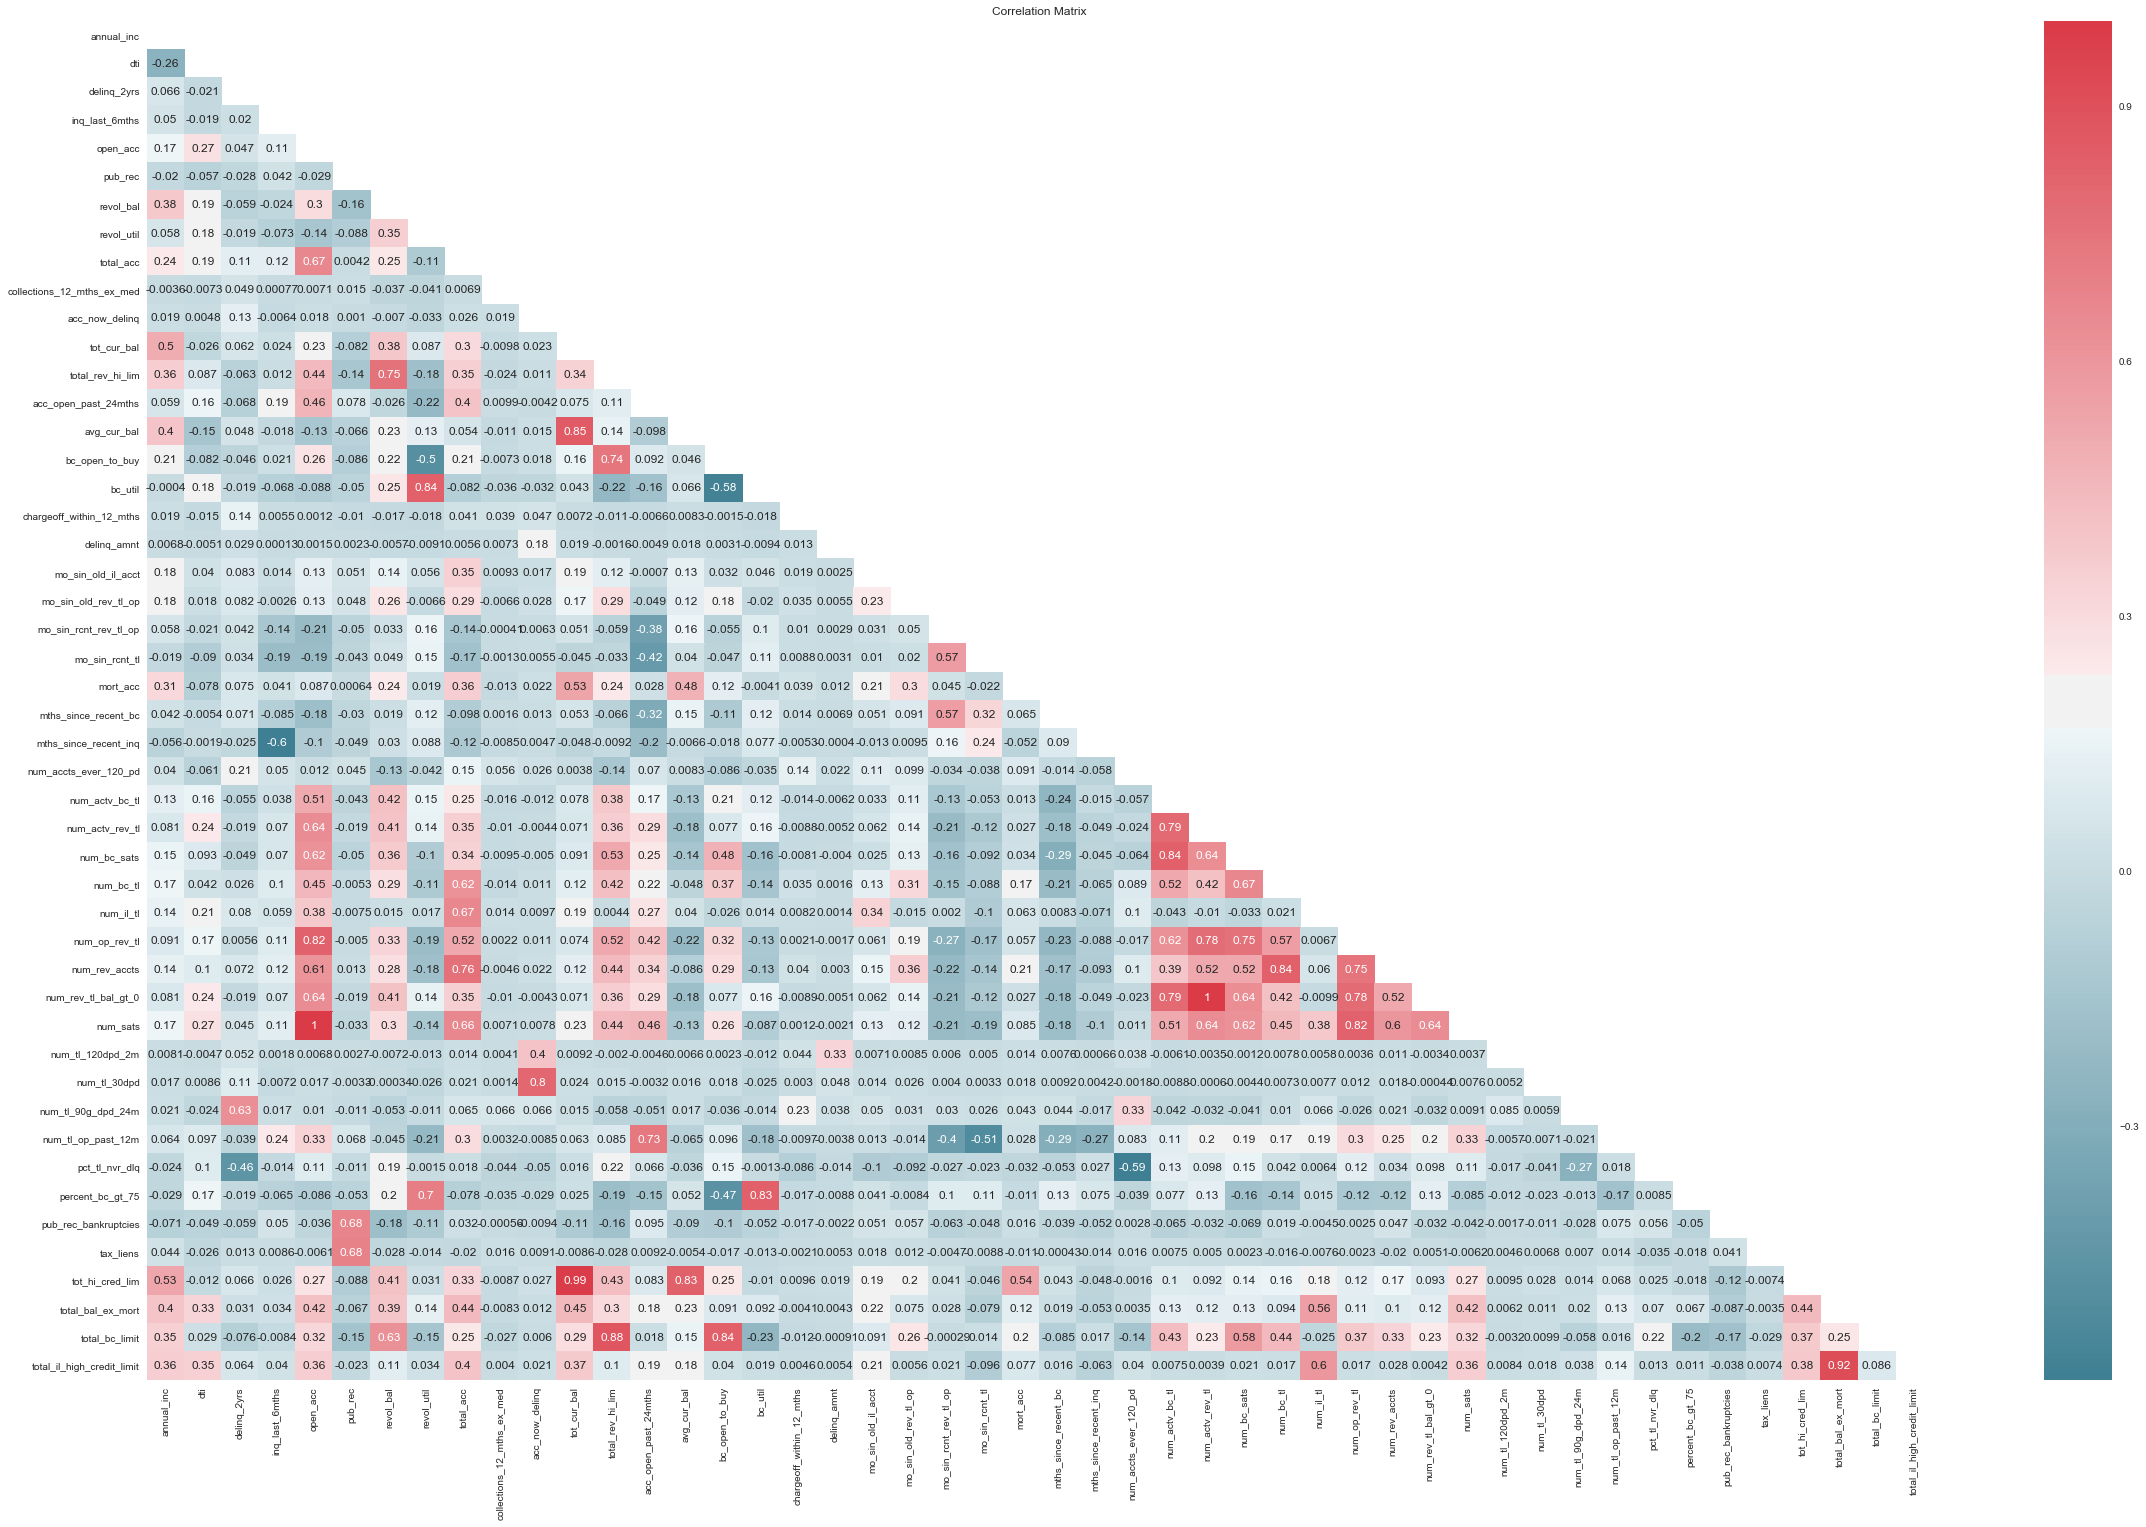

In [15]:
corr = X.corr()

sns.set(style="white")
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(40, 25))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, linewidths=0, vmax=1, ax=ax , annot=True)
ax.set_title('Correlation Matrix');

### Correlated features ranked in descending order

In [16]:
df = pd.DataFrame (X)
c = df.corr()
s = c.unstack().drop_duplicates()
so = s.sort_values(ascending=False)

HTML(DataFrame(so).to_html())

,,0
annual_inc,annual_inc,1.000000
open_acc,num_sats,0.999176
num_actv_rev_tl,num_rev_tl_bal_gt_0,0.998746
tot_cur_bal,tot_hi_cred_lim,0.986775
total_bal_ex_mort,total_il_high_credit_limit,0.917949
total_rev_hi_lim,total_bc_limit,0.875417
tot_cur_bal,avg_cur_bal,0.854231
num_actv_bc_tl,num_bc_sats,0.836917
num_bc_tl,num_rev_accts,0.836067
bc_open_to_buy,total_bc_limit,0.835252
